In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
train = pd.read_csv('data/train_1.csv')
test = pd.read_csv('data/test_1.csv')

# Save the 'Id' column (important for submission)
train_ID = train['Id']
test_ID = test['Id']

# Id is not needed for prediction
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

# 0. Warm up

In [3]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-

## 1. EDA (Exploratory Data Anaylsis)

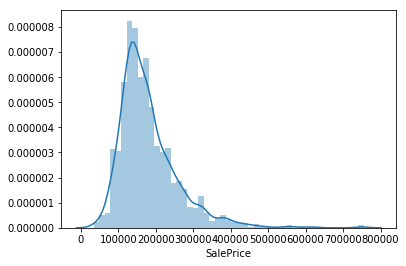

In [6]:
sns.distplot(train['SalePrice'])

# 2. Feature Engineering

**IMPORTANT** note: When you transform (change/delete/add columns) your train data you need to apply the same transformations to your test data. This is because your model will learn to make predictions with the transformed train data. It doesn't know how to handle untransformed data.

In [ ]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)

### Missing data (VERY IMPORTANT)

In [ ]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
len(all_data_na)
missing_data.head(5)

## Encoding of categorical variables

**Label encoding**: Each catgeory is assigned to one number (order adds information)  
**One-hot enconding**: Each cageory ais represented as one separat feature (no specific order; blows up the feature space)

### Adding/Combining features

In [ ]:
# Example
# all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

# 3. Model building

In [ ]:
train = all_data[:ntrain]
test = all_data[ntrain:]

In [ ]:
train.shape

## Cross validation

In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import KFold, cross_val_score
import math

In [ ]:
y_train_log = np.log1p(y_train)

def rmse_cv(model):
    return (np.sqrt(-cross_val_score(model, train.values, y_train_log, scoring="neg_mean_squared_error", cv = 5)))

In [ ]:
model_rf = RandomForestRegressor()

In [ ]:
score = rmse_cv(model_rf)
print("Random Forest score: {:.4f}".format(score.mean()))

In [ ]:
model_rf.fit(train,y_train_log)

In [ ]:
f_i = model_rf.feature_importances_

In [ ]:
feature_importance = pd.DataFrame(data=f_i, index=train.columns)
feature_importance_top_15 = feature_importance.sort_values(by=0).nlargest(15,0)

In [ ]:
sns.barplot(y=feature_importance_top_15.index,x=feature_importance_top_15.loc[:, 0])

## Hyperparameter optimization

In [ ]:
from sklearn.model_selection import GridSearchCV

# 4. Make a submission

In [ ]:
prediction = model_rf.predict(test)

In [ ]:
prediction = np.exp(prediction)

In [ ]:
prediction = pd.DataFrame(data=prediction, index=test_ID, columns=['SalePrice'])

In [ ]:
prediction.head()

In [ ]:
prediction.to_csv('submissions/submission_starter_1.csv')